In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os

import cv2
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
import cv2
import os

categories = ['Neem Leaf', 'Mint Leaf', 'Curry Leaf', 'Arjun Leaf', 'Marsh Pennywort Leaf']
dir_path = './Augmented Images/Augmented Images/'
dataset = []
SIZE = 256

def load_images(dir_path, category):
    count = 0
    path = os.path.join(dir_path, category)
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image_array is not None:
            new_array = cv2.resize(image_array, (SIZE, SIZE))
            dataset.append([new_array, category])
            count += 1
        else:
            print(f"Error: Unable to read image '{image_path}'")
    return count

total_count = 0
for category in categories:
    count = load_images(dir_path, category)
    print(f"Number of {category} images: {count}")
    total_count += count

print(f"Total number of images: {total_count}")


Number of Neem Leaf images: 490
Number of Mint Leaf images: 1540
Number of Curry Leaf images: 1155
Number of Arjun Leaf images: 1540
Number of Marsh Pennywort Leaf images: 1470
Total number of images: 6195


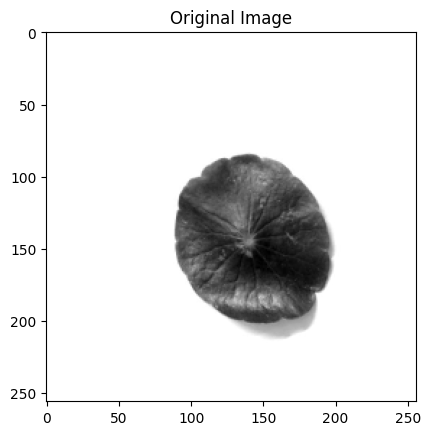

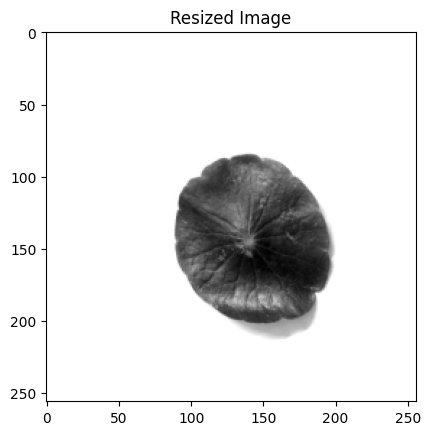

In [4]:
import matplotlib.pyplot as plt
last_image = dataset[-1][0]
last_resized_image = cv2.resize(last_image, (SIZE, SIZE))

plt.imshow(last_image, cmap="gray")
plt.title("Original Image")
plt.show()

plt.imshow(last_resized_image, cmap="gray")
plt.title("Resized Image")
plt.show()

In [5]:
import numpy as np

x = []
y = []

for feature, label in dataset:
    x.append(feature)
    y.append(label)

x = np.array(x)
y = np.array(y)

x = x.reshape(-1, SIZE, SIZE, 1)

x = x / 255.0

print("Shape of x:", x.shape)


Shape of x: (6195, 256, 256, 1)


In [6]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (4956, 256, 256, 1)
Shape of X_test: (1239, 256, 256, 1)
Shape of Y_train: (4956,)
Shape of Y_test: (1239,)
